# Probabilistyczne modele graficzne

Kornel Kiełczewski, MINI, PW. 
17.10.2016
Seminarium Bio

## Opis

Probabilistyczny model graficzny za pomocą grafu opisuje strukturę warunkowych zależności pomiędzy zmiennymi losowymi. Model taki pomaga zdefiniować łączny rozkład prawdopodobieństwa. 

Można wyróżnić dwa rodzaje:

1. Bayesian Network (ang Sieć Bayesowska)
1. Markov Network (ang Sieć Markova)

Sieci bayesowskie opisują rozkład za pomocą skierowanego acyklicznego grafu (DAG), sieci Markova za pomocą nieskierowanego grafu.

Każdy z nich potrafi opisać warunkowe zależności których ten drugi nie jest w stanie uchwycić i vice versa.

## Zastosowania

Modele te zostały skutecznie zastosowane w przetwarzaniu języka naturalnego (NLP), rozpoznawaniu mowy (speech recognition), rozpoznawaniu obrazów (computer vision), modelowaniu "Gene Regulatory Networks" oraz graficnzych modeli struktur białkowych.

# Sieć Bayesowska

## Przykład

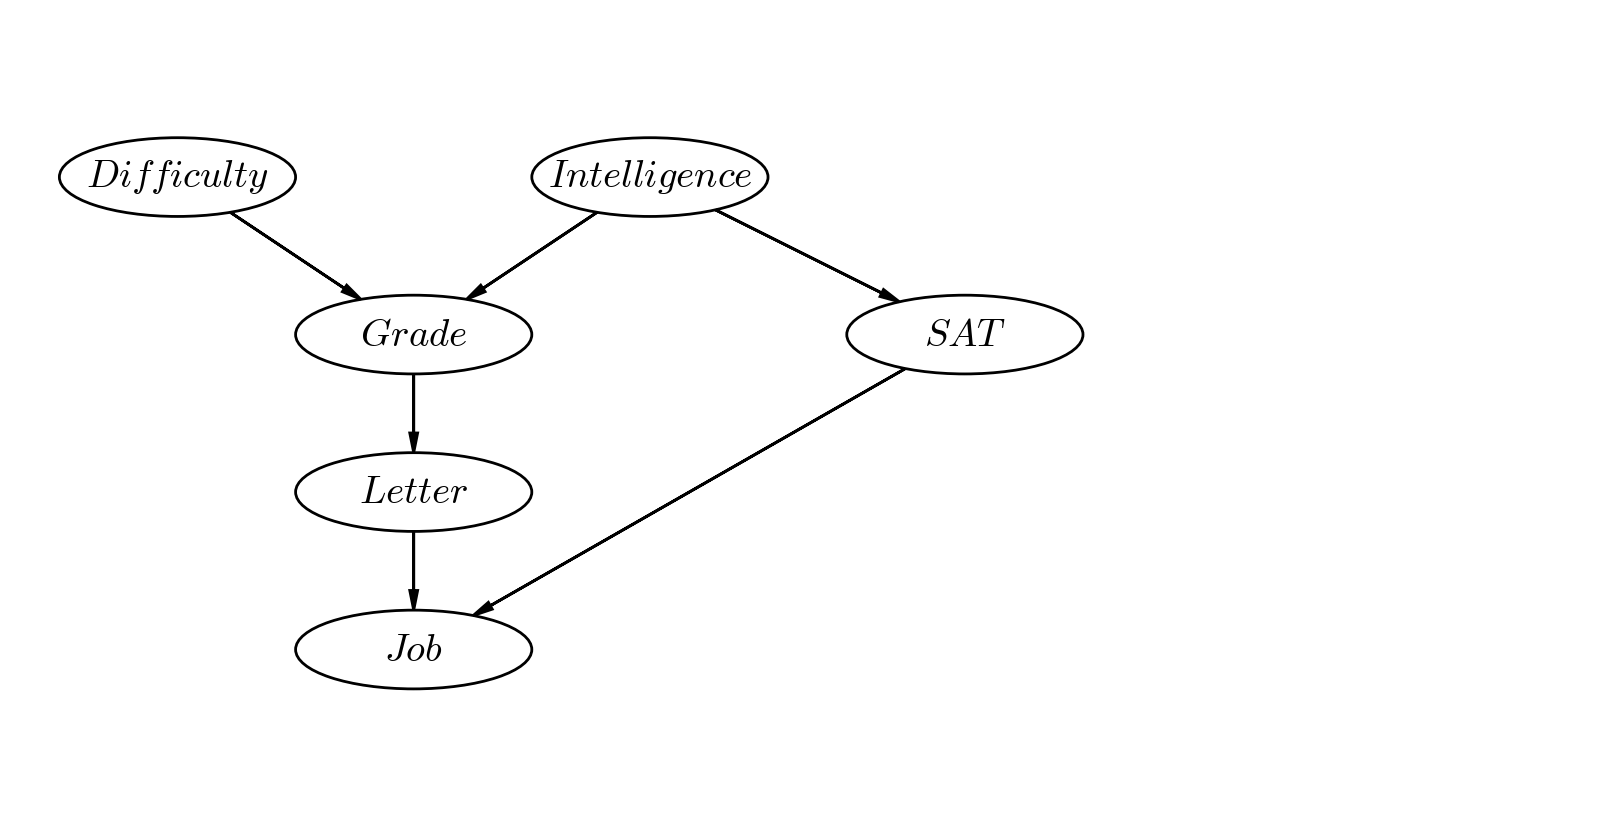

In [482]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import daft
ymax = 5
pgm = daft.PGM(shape=[10, ymax], origin=[0, 0], label_params={'fontsize': 14})

pgm.add_node(daft.Node('diff', r'$Difficulty$', 1, ymax - 1, aspect=3))
pgm.add_node(daft.Node('int', r'$Intelligence$', 4, ymax - 1, aspect=3))
pgm.add_node(daft.Node('grade', r'$Grade$', 2.5, ymax - 2, aspect=3))
pgm.add_node(daft.Node('sat', r'$SAT$', 6, ymax - 2, aspect=3))
pgm.add_node(daft.Node('let', r'$Letter$', 2.5, ymax - 3, aspect=3))
pgm.add_node(daft.Node('job', r'$Job$', 2.5, ymax - 4, aspect=3))

pgm.add_edge('diff', 'grade')
pgm.add_edge('int', 'grade')
pgm.add_edge('int', 'sat')
pgm.add_edge('grade', 'let')
pgm.add_edge('let', 'job')
pgm.add_edge('sat', 'job')
pgm.render()
plt.show()

Graf ten przedstawia rozkład:

$P(D, I, G, L, S, J) = P(D) \cdot P(I) \cdot P(G \vert I, D) \cdot P(L \vert G) \cdot P(J \vert L, S) \cdot P(S \vert I)$

## Wprowadzenie 

### Struktura sieci Bayesowskiej (ang Bayesian network structure)  $G$

DAG, gdzie każdy wierzchołek $v \in G$ przedstawia zmienną losową $X_v$, bez założeń co do rozkładu $X_v$.


### Sieć Bayesowska (ang Bayesian network) $BN(G, P)$

1. Struktura G
1. Zbiór rozkładów warunkowych (ang Conditional Probability Distribution - CPD) $P(X_v | Pa_{X_v})$ gdzie $Pa_{X_v}$ to zbiór rodziców $X_v$ takich, gdzie $P(X_1, X_2, ... X_n) = \prod_{i=1}^{n} P(X_i \vert Pa_{Xi})$

### Active trails
Ścieżka prosta $X_n, X_{n+1}, \ldots X_{n+k}$ dla znanych zmiennych $O \subseteq \{ X_1, X_2, \ldots, X_n \}$
jest "aktywna" jeśli dla każdych $X_{i - 1}, X_{i}, X_{i+1}$

1. $X_{i-1} \longrightarrow X_{i} \longrightarrow X_{i+1}$, oraz $X_{i} \notin O$
1. $X_{i-1} \longleftarrow X_{i} \longleftarrow X_{i+1}$, oraz $X_{i} \notin O$
1. $X_{i-1} \longleftarrow X_{i} \longrightarrow X_{i+1}$, oraz $X_{i} \notin O$
1. $X_{i-1} \longrightarrow X_{i} \longleftarrow X_{i+1}$, oraz $X_{i} \in O$, lub $Desc(X_i) \in O$, gdzie przez $Desc(X_i)$ oznaczam dzieci $X_i$

### d-separation $d$-$sep(A, B \vert O)$
Dla każdych ${X_i,X_j}$ dla których nie istnieje aktywna ścieżka dla obserwacji $O$ mówimy, że są d-separated dla O co się oznacza $d$-$sep(X_i,X_j \vert O)$

Analogicznie dla zbiorów $A$ oraz $B$: $\forall{x\in A}, \forall{y \in B}$  $d$-$sep(x, y \vert O) \implies d$-$sep(X_i,X_j \vert O)$

1. Oznaczmy $I(G) = \{ (X \perp Y \vert Z) : d$-$sep_G(X, Y \vert Z) \}$
1. Wtedy $I(G) \subset I(P)$
1. *G is an I-map of P*

Można się zastanowić:
1. Kiedy $I(G) = I(P)$ 


### Przykład 
Załóżmy, że $Letter$ jest zaobserwowane

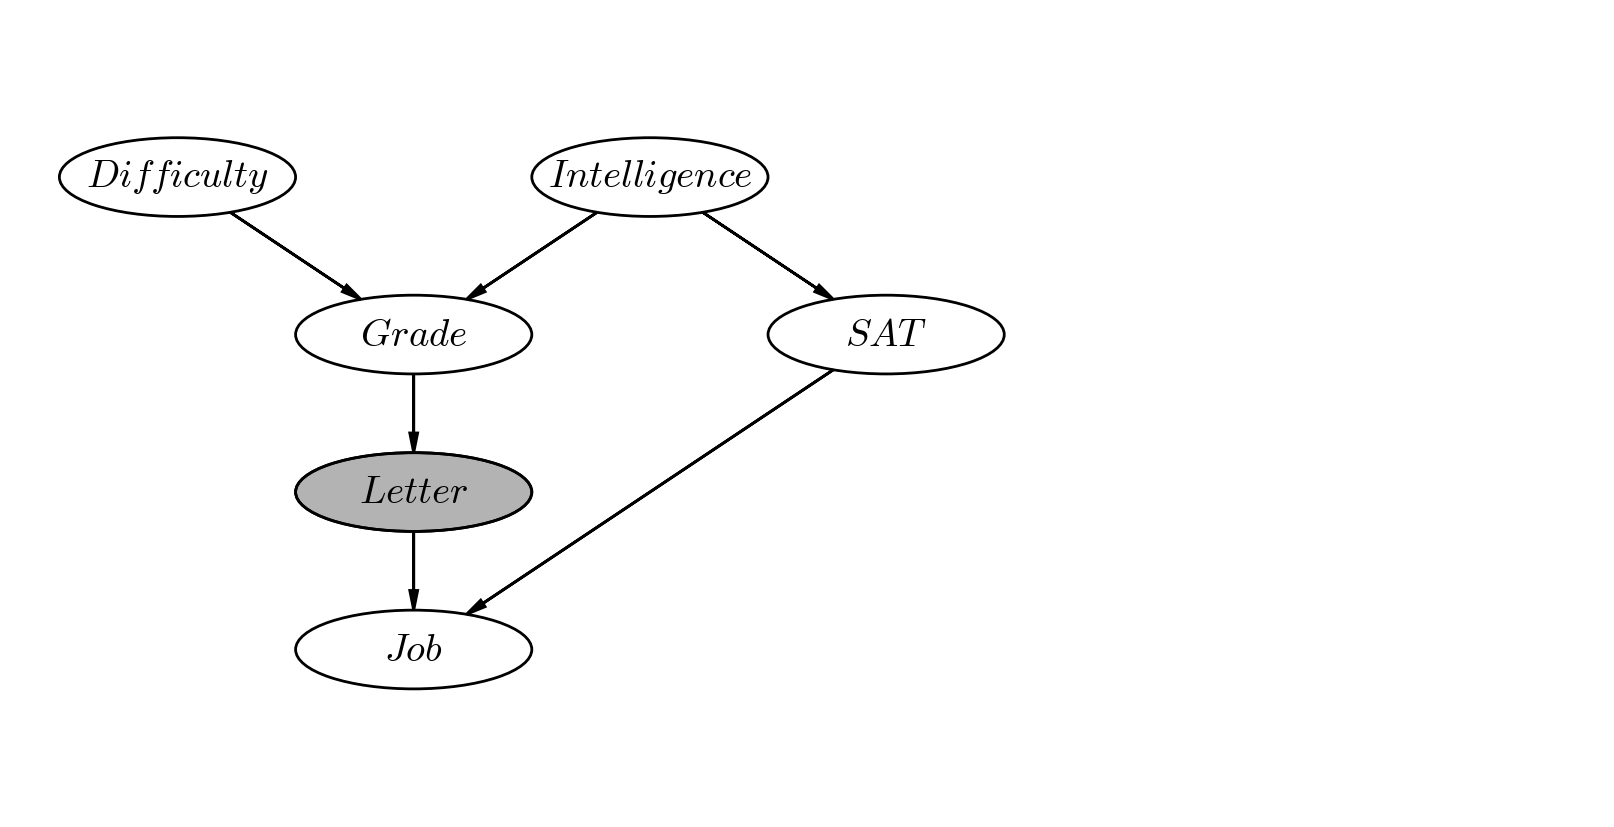

In [305]:
ymax = 5
pgm = daft.PGM(shape=[10, ymax], origin=[0, 0], label_params={'fontsize': 14})

pgm.add_node(daft.Node('diff', r'$Difficulty$', 1, ymax - 1, aspect=3))
pgm.add_node(daft.Node('int', r'$Intelligence$', 4, ymax - 1, aspect=3))
pgm.add_node(daft.Node('grade', r'$Grade$', 2.5, ymax - 2, aspect=3))
pgm.add_node(daft.Node('sat', r'$SAT$', 5.5, ymax - 2, aspect=3))
pgm.add_node(daft.Node('let', r'$Letter$', 2.5, ymax - 3, aspect=3, observed=True))
pgm.add_node(daft.Node('job', r'$Job$', 2.5, ymax - 4, aspect=3))

pgm.add_edge('diff', 'grade')
pgm.add_edge('int', 'grade')
pgm.add_edge('int', 'sat')
pgm.add_edge('grade', 'let')
pgm.add_edge('let', 'job')
pgm.add_edge('sat', 'job')
pgm.render()
plt.show()

Z tego wynika, że istnieje aktywna ścieżka pomiędzy $Difficulty$ a $Intelligence$, z czego wynika, że nie istnieje $d$-$sep(D, I | L) \implies$ że $Difficulty$ oraz $Intelligence$ są od siebie w tym momencie zależne. 

# Markov Random Field

...

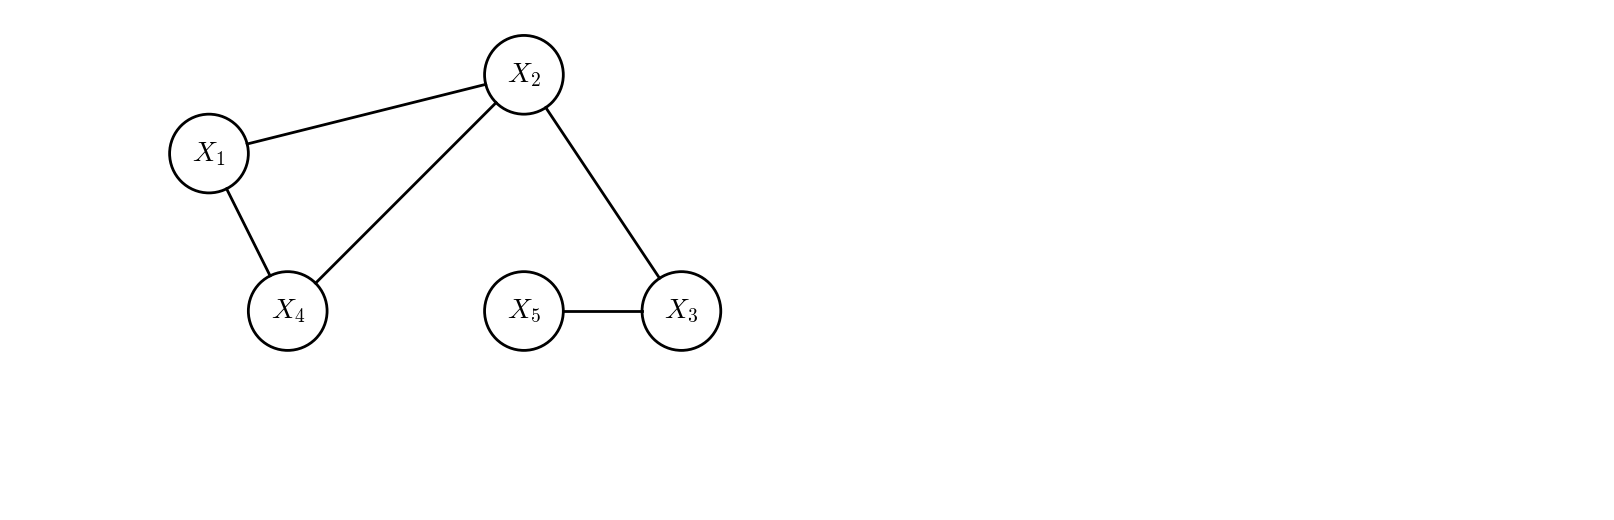

In [479]:
pgm = daft.PGM([10, 3.05], origin=[0.3, 0.3])


pgm.add_node(daft.Node("x1", r"$X_1$", 1.5, 2.5, aspect=1))
pgm.add_node(daft.Node("x2", r"$X_2$", 3.5, 3, aspect=1))
pgm.add_node(daft.Node("x3", r"$X_3$", 4.5, 1.5, aspect=1))

pgm.add_node(daft.Node("x4", r"$X_4$", 2, 1.5, aspect=1))
pgm.add_node(daft.Node("x5", r"$X_5$", 3.5, 1.5, aspect=1))

pgm.add_edge('x1', 'x2', directed=False)
pgm.add_edge('x2', 'x3', directed=False)
pgm.add_edge('x1', 'x4', directed=False)
pgm.add_edge('x3', 'x5', directed=False)
pgm.add_edge('x2', 'x4', directed=False)

pgm.render()
plt.show()

# Uczenie

Czego nie znamy, a co chcielibyśmy poznać za pomocą danych:

1. Struktury
1. Rozkładu $P(D, I, G, L, S, J)$

Gdy nie znamy struktury, problem nauczenia sieci można interpretować następująco:

> Dla zbioru uczącego $D = \{\textbf{x}_1, \textbf{x}_2, \dots , \textbf{x}_n\}$ niezależnych realizacji $X$, znajdź sieć $B = \langle G, \Theta \rangle$ która najlepiej *opisuje* $D$.

Zazwyczaj tworzymy funkcję oceny która ocenia każdą sieć dla zbioru uczącego i poszukujemy najlepszej instancji wg. tej funkcji oceny. 

Trudności pojawiają się gdy w danych uczących występują braki.

# Modele płytkowe

Modele płytkowe pozwalają na zwięzłą reprezentację powtarzających się zmiennych w modelu graficznym. 

## Przykłady

### Poprzedni model opisujący "karierę"

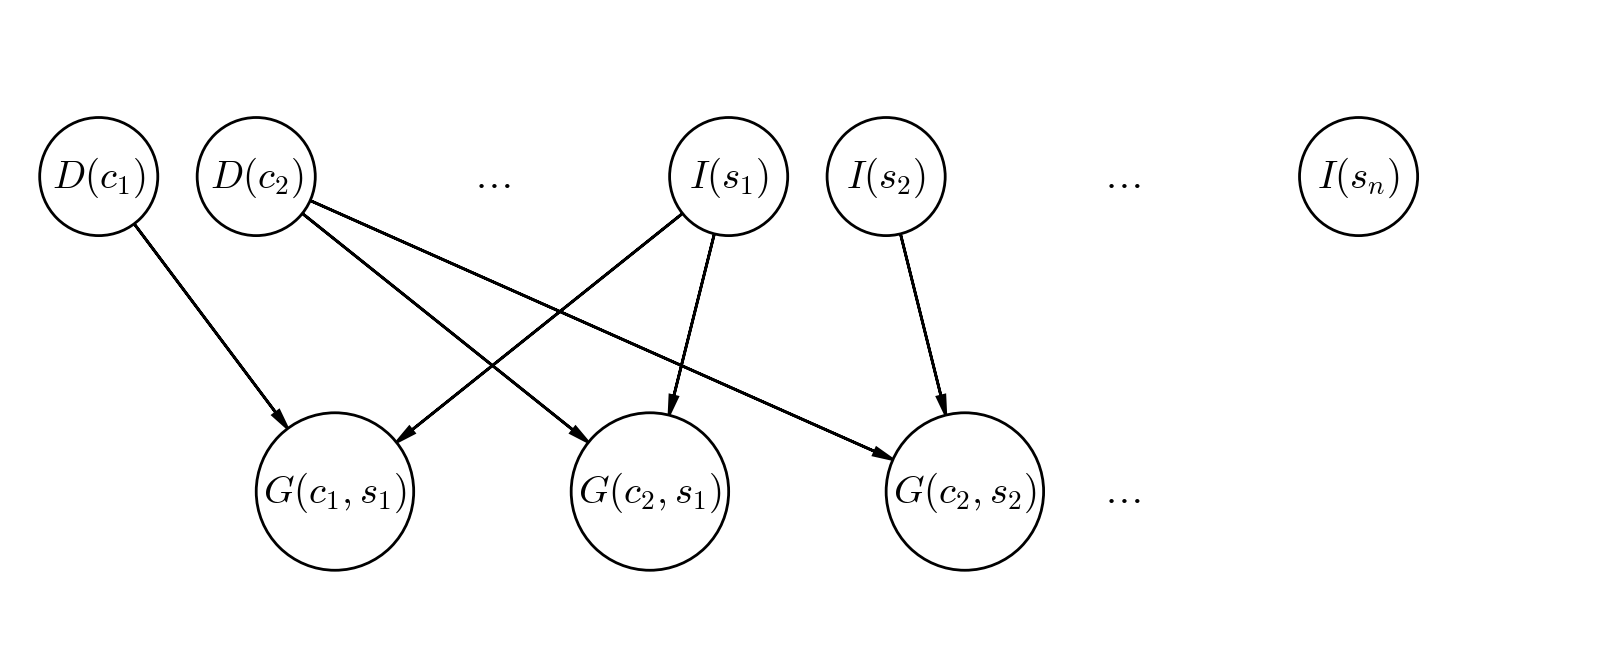

In [304]:
import daft
pgm = daft.PGM(shape=[10, 4], origin=[0, 0], label_params={'fontsize': 14}, observed_style='shaded')

pgm.add_node(daft.Node('d1', r'$D(c_1)$', 0.5, 3, scale=1.5))
pgm.add_node(daft.Node('d2', r'$D(c_2)$', 1.5, 3, scale=1.5))
pgm.add_node(daft.Node('i1', r'$I(s_1)$', 4.5, 3, scale=1.5))
pgm.add_node(daft.Node('i2', r'$I(s_2)$', 5.5, 3, scale=1.5))
pgm.add_node(daft.Node('i3', r'$I(s_n)$', 8.5, 3, scale=1.5))

pgm.add_node(daft.Node('g1', r'$G(c_1,s_1)$', 2, 1, scale=2))
pgm.add_node(daft.Node('g2', r'$G(c_2,s_1)$', 4, 1, scale=2))
pgm.add_node(daft.Node('g3', r'$G(c_2,s_2)$', 6, 1, scale=2))


pgm.add_node(daft.Node('dot1', r'$\dots$', 7, 3, scale=1.5, plot_params={"ec": "none"}))
pgm.add_node(daft.Node('dot2', r'$\dots$', 3, 3, scale=1.5, plot_params={"ec": "none"}))
pgm.add_node(daft.Node('dot3', r'$\dots$', 7, 1, scale=2, plot_params={"ec": "none"}))

pgm.add_edge('d1', 'g1')
pgm.add_edge('i1', 'g1')
pgm.add_edge('d2', 'g2')
pgm.add_edge('i1', 'g2')
pgm.add_edge('d2', 'g3')
pgm.add_edge('i2', 'g3')

pgm.render()
plt.show()

Za pomocą modelu płytkowego, możemy przedstawić model następująco:

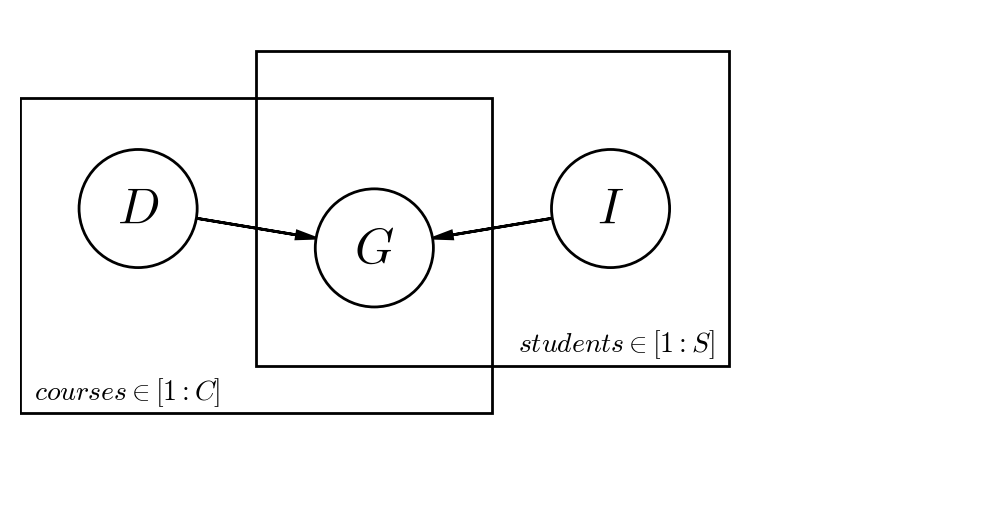

In [418]:
pgm = daft.PGM(shape=[6, 3], origin=[0, 0], label_params={'fontsize': 18}, observed_style='shaded')

pgm.add_plate(daft.Plate([0, 0.5, 3, 2], label=r'$courses \in [1:C]$'))
pgm.add_plate(daft.Plate([1.5, 0.8, 3, 2], label=r'$students \in [1:S]$', position=u'bottom right'))

pgm.add_node(daft.Node('diff', r'$D$', 0.75, 1.8, scale=1.5))
pgm.add_node(daft.Node('int', r'$I$', 3.75, 1.8, scale=1.5))
pgm.add_node(daft.Node('grade', r'$G$', 2.25, 1.55, scale=1.5))

pgm.add_edge('diff', 'grade')
pgm.add_edge('int', 'grade')

pgm.render()
plt.show()

### Naïve Bayes

W wariancie sieci Bayesowskiej zaprezentowanej za pomocą grafu i modelu płytkowego:

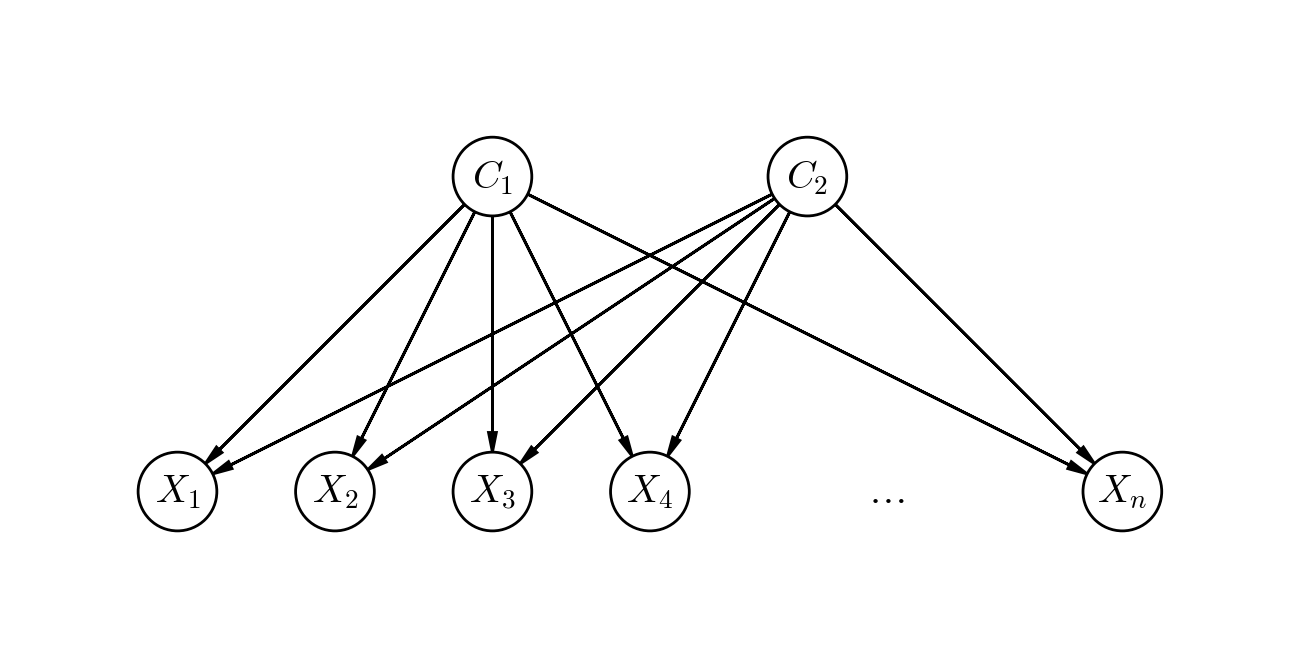

In [422]:
xmax = 8
ymax = 4
pgm = daft.PGM(shape=[xmax, ymax], origin=[0, 0], label_params={'fontsize': 14})

pgm.add_node(daft.Node('c1', r'$C_1$', xmax / 2 - 1, ymax - 1))
pgm.add_node(daft.Node('c2', r'$C_2$', xmax / 2 + 1, ymax - 1))

pgm.add_node(daft.Node('x1', r'$X_1$', 1, ymax - 3))
pgm.add_node(daft.Node('x2', r'$X_2$', 2, ymax - 3))
pgm.add_node(daft.Node('x3', r'$X_3$', 3, ymax - 3))
pgm.add_node(daft.Node('x4', r'$X_4$', 4, ymax - 3))
pgm.add_node(daft.Node('xn', r'$X_n$', xmax - 1, ymax - 3))
pgm.add_node(daft.Node('xn', r'$X_n$', xmax - 1, ymax - 3))
pgm.add_node(daft.Node('dots', r'$\dots$', 5.5, ymax - 3, scale=1.5, plot_params={"ec": "none"}))

pgm.add_edge('c1', 'x1')
pgm.add_edge('c1', 'x2')
pgm.add_edge('c1', 'x3')
pgm.add_edge('c1', 'x4')
pgm.add_edge('c1', 'xn')

pgm.add_edge('c2', 'x1')
pgm.add_edge('c2', 'x2')
pgm.add_edge('c2', 'x3')
pgm.add_edge('c2', 'x4')
pgm.add_edge('c2', 'xn')

pgm.render()
plt.show()

### $P(C_1, X_1, X_2, \dots, X_n) = P(C_1) \cdot \prod_{i=1}^{n} P(X_i \vert C)$



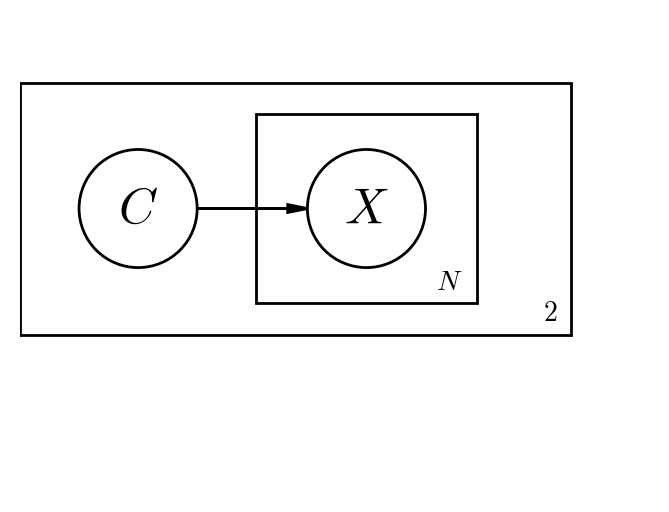

In [427]:
pgm = daft.PGM(shape=[4, 3], origin=[0, 0], label_params={'fontsize': 18}, observed_style='shaded')

pgm.add_plate(daft.Plate([0, 1, 3.5, 1.6], label=r'$2$', position=u'bottom right'))
pgm.add_plate(daft.Plate([1.5, 1.2, 1.4, 1.2], label=r'$N$', position=u'bottom right'))

pgm.add_node(daft.Node('c', r'$C$', 0.75, 1.8, scale=1.5))
pgm.add_node(daft.Node('x', r'$X$', 2.2, 1.8, scale=1.5))

pgm.add_edge('c', 'x')

pgm.render()
plt.show()

## Problemy

### LDA

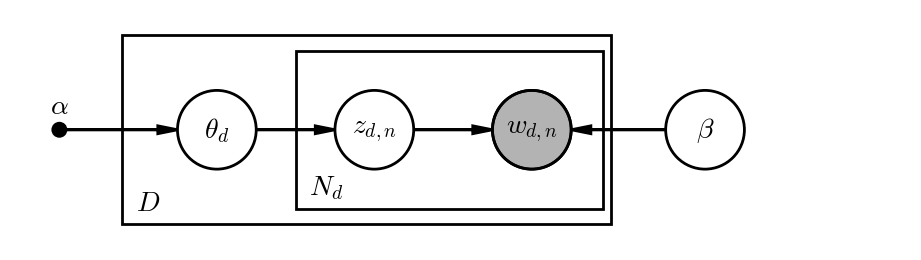

In [437]:
pgm = daft.PGM([5.6, 1.4], origin=[0.75, 0.3])

pgm.add_plate(daft.Plate([1.4, 0.4, 3.1, 1.2], r"$D$"))
pgm.add_plate(daft.Plate([2.5, 0.5, 1.95, 1], r"$N_d$"))

pgm.add_node(daft.Node("alpha", r"$\alpha$", 1, 1, fixed=True))
pgm.add_node(daft.Node("theta", r"$\theta_d$", 2, 1))
pgm.add_node(daft.Node("z", r"$z_{d,n}$", 3, 1))
pgm.add_node(daft.Node("w", r"$w_{d,n}$", 4, 1, observed=True))

pgm.add_node(daft.Node("beta", r"$\beta$", 5.1, 1))

pgm.add_edge("alpha", "theta")
pgm.add_edge("theta", "z")
pgm.add_edge("z", "w")

pgm.add_edge("beta", "w")

pgm.render()
plt.show()

Zwykły opis (ang generative story) vs model płytkowy (z oryginalnej publikacji Blei, Ng, Jordan)

`
LDA zakłada, że każde słowo $w_{d,n}$ z korpusu $N_d$ dokumentów zostało wygenerowane w następujący sposób:

1. Wybierz $N_d$ ~ $Poisson(\xi)$
1. Wybierz $\theta_d$ ~ $Dir(\alpha)$
1. Dla każdego z $N_d$ słów:
 1. Wybierz temat $z_{d,n}$ ~ $Multionmial(\theta_d)$
 1. Wybierz słowo $w_{d,n}$ z $P(w_{d,n} \vert z_{d,n}, \beta)$, wielomianowego rozkładu warunkowanego tematem $z_{d,n}$
 `

### Mixture model for expression deconvolution

> A mixture model for expression deconvolution from RNA-seq in heterogeneous tissues, Yi Li and Xiaohui Xie, BMC Bioinformatics 2013
https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-S5-S11

1. $y^p_{i,t} = 1$ gdy odczyt $i$ pochodzi z tranksryptu $t$ z *czystej* próbki $R^p$
1. $y^m_{i,t} = 1$ analgoicznie dla próbki *mieszanej* $R^m$
1. $\alpha_t$ prawdopodobieństwo że odczyt $t$ pochodzi z danej próbki
1. $\tilde{l_t}$ długość tranksrpytu t
1. ...

![Temt](TEMT.jpg)

# Using Bayesian Networks to Analyze Expression Data

Friedman, Linial, Nachman, Pe'er

## Uczenie

Prawdopodobieństwo a posteriori otrzymania grafu $G$ dla danych $D$:

$S(G : D) = log P(G \vert D) = log P(D \vert G) + log P(G) + C$, gdzie C jest stałą niezależną od G

$P(D | G) = \int P(D \vert G, \Theta)P(\Theta \vert G)d\Theta$ - brzegowa wiarygodność uśredniająca prawdopodobieństwo danych dla kazdego możliwego wyobru parametrów dla G.

> Dla wystarczająco dużej ilości sampli, struktury które wyłapują wszystkie niezależności rozkładu dostaną z wysokim prawdopodobieństwem wyższą ocenę od innych grafów (Firedman, Yakhini 1996)

### 3 Analyzing Expression Data

http://www.cs.huji.ac.il/~nirf/Papers/FLNP1Full.pdf

> First we present our modeling assumptions. We consider probability distributions over all
possible states of the system in question (a cell or an organism and its environment). We describe
the state of the system using random variables. These random variable denote the expression level
of individual genes. In addition, we can include random variables that denote other attributes that
affect the system, such as experimental conditions, temporal indicators (i.e., the time/stage that the
sample was taken from), background variables (e.g., which clinical procedure was used to get a
biopsy sample), and exogenous cellular conditions.

>We thus attempt to build a model which is a joint distribution over a collection of random
variables. If we had such a model, we could answer a wide range of queries about the system.
For example, does the expression level of a particular gene depend on the experimental condition?
Is this dependence direct, or indirect? If it is indirect, which genes mediate the dependency? Not
having a model at hand, we want to learn one from the available data and use it to answer questions
about the system.

>In order to learn such a model from expression data, we need to deal with several important
issues that arise when learning in this domain. These involve statistical aspects of interpreting the
results, algorithmic complexity issues in learning from the data, and the choice of local probability
models.

>Most of the difficulties in learning from expression data revolve around the following central
point: Contrary to most previous applications of learning Bayesian networks, expression data involves
transcript levels of thousands of genes while current data sets contain at most a few dozen
samples. This raises problems in computational complexity and the statistical significance of the
resulting networks. On the positive side, genetic regulation networks are sparse, i.e., given a gene,
it is assumed that no more than a few dozen genes directly affect its transcription. Bayesian networks
are especially suited for learning in such sparse domains.


### 3.3 Efficient Learning Algorithm

> In section 2.3, we formulated learning Bayesian network structure as an optimization problem in
the space of directed acyclic graphs.

> The main idea of this technique is that we can identify a relatively small
number of candidate parents for each gene based on simple local statistics (such as correlation).
We then restrict our search to networks in which only the candidate parents of a variable can be
its parents, resulting in a much smaller search space in which we can hope to find a good structure
quickly.

### 3.4 Local Probability Models

> In order to specify a Bayesian network model, we still need to choose the type of the local probability
models we learn. In the current work, we consider two approaches:

> ❖ Multinomial model. In this model we treat each variable as discrete and learn a multinomial
distribution that describes the probability of each possible state of the child variable given
the state of its parents.

> ❖ Linear Gaussian model. In this model we learn a linear regression model for the child
variable given its parents.

> To apply the multinomial model we need to discretize the gene expression values. We choose to
discretize these values into three categories: under-expressed (-1), normal (0), and over-expressed (1), depending on whether the expression rate is significantly lower than, similar to, or greater than
control, respectively.

> Each of these two models has benefits and drawbacks. On one hand, it is clear that by discretizing
the measured expression levels we are loosing information. The linear-Gaussian model does not suffer from the information loss caused by discretization. On the other hand, the linearGaussian
model can only detect dependencies that are close to linear. In particular, it is not likely
to discover combinatorial effects (e.g., a gene is over expressed only if several genes are jointly
over expressed, but not if at least one of them is not over expressed). The multinomial model is
more flexible and can capture such dependencies.

### Przemyślenia

1. Closed form solutions
1. More data

# MCMC - TODO 

# Dziękuję za uwagę.

> "Cechą charakterystyczną raportu jest, że utożsamia postęp ludzkości z postępem nauki (mit XX wieku) i umieszcza poza nawiasem swych rozważań historię. Tak jakby nigdy dotąd głuchy marsz barbarzyńców nie przekreślał, nie burzył świetlistych wizji rozumu". 
> Z. Herbert, 1966. Opisać rzeczywistość. 